### Clustering
- Clustering is similar to classification, but the basis is different. 
- In Clustering you don’t know what you are looking for, and you are trying to identify some segments or clusters in your data.
- When you use clustering algorithms on your dataset, unexpected things can suddenly pop up like structures, clusters and groupings you would have never thought of otherwise.
- It's an Unsupervised Learning

In [1]:
import os, sys

sys.path.append(os.path.abspath("Datasets"))
sys.path.append(os.path.abspath("Images"))

### K-Means clustering:

#### What K-Means does?
- First thing is that, there is no label in the dataset! That's why it's called unsupervised learning.
<img src="Images/13_1_K_Mean_1.JPG" height="300">
- K-Means can work with multidimensional (multi independent variables)

#### How K-Means works?
- **Step 1**: Choose the number K of clusters (How many classes)
- **Step 2**: Select at random K points which will be the centroids (not necessarily from 1 of the data point within dataset)
- **Step 3**: Assign each data point to the closest centroid => That forms K clusters (Using Eucledian distance or others, can be chosen)
- **Step 4**: Compute and replace the new centroid of each cluster. (Center of mass, gravity)
- **Step 5**: Reassign each data point to the new closest centroid. If any reassignment took place, go to Step 4, otherwise Finish.

#### Visualize those steps:
<img src="Images/13_2_Step_1.JPG" width="300">
<img src="Images/13_2_Step_2.JPG" height="300">
<img src="Images/13_2_Step_3.JPG" height="300">
<img src="Images/13_2_Step_4.JPG" width="400">
<img src="Images/13_2_Step_5.JPG" width="400">
##### Back to step 4
<img src="Images/13_2_Step_4_2.JPG" width="400">
<img src="Images/13_2_Step_5_2.JPG" width="400">
... And go on
##### Finally:
<img src="Images/13_2_final.JPG" width="400">
<img src="Images/13_3_model.JPG" width="400">

#### Random Initialization Trap
<img src="Images/13_4_Trap_1.JPG" width="300">
... so we end up with
<img src="Images/13_4_Trap_2.JPG" width="300">
- The question is: what if we locate the centroids at the beginning at different positions that can make the result different? (Bad random initialization)

- Problem in steps:
<img src="Images/13_4_Trap_3.JPG" height="400">
<img src="Images/13_4_Trap_4.JPG" height="400">
... and then recalculate
<img src="Images/13_4_Trap_5.JPG" width="400">
... and we have totally different result:
<img src="Images/13_4_Trap_6.JPG" width="400">

- **True clusters**:
<img src="Images/13_4_Trap_2.JPG" width="300">
- **New clusters**:
<img src="Images/13_4_Trap_final.JPG" width="300">

=> The selection of centroids at the beginning plays a very important role, can dictate the algorithm. The centroids are selected randomly, so how can we combat it?

=> **K-Means++ algorithm**

#### Choosing the right number of clusters
- Given dataset:
<img src="Images/13_5_dataset.JPG" width="400">
- How can we know 3 is the best, or 5, 10?
<img src="Images/13_5_3_clusters.JPG" width="400">
- Within classes Sum of Square (WCSS): (for 3 clusters)
<img src="Images/13_5_WCSS.JPG" width="500">

- WCSS will change if we change the number of centroids, or the position of centroids.
- Increase number of clusters reduce the WCSS (10 points, 10 clusters => WCSS = 0)
- What is the optimal WCSS, too low can create overfit. 
<img src="Images/13_5_WCSS_Chart.JPG" width="500">
- We see that from 1 to 2, it changes 5000, 2 to 3, it changes 2000, but then it jumps not much from 4 upwards.
- The elbow method: optimal number of cluster is at the elbow!, or K = 3 in the above figure.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataset = pd.read_csv("Datasets/ML_a_z/Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:, 3:].values
# Clustering problem, we don't have y, no answer. The bank wants to
# know how many clusters of clients should be segmented


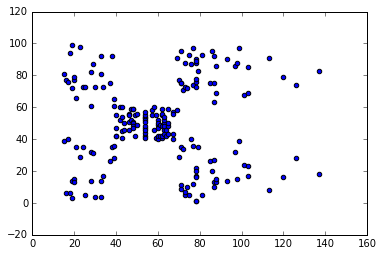

In [7]:
plt.scatter(X[:, 0], X[:, 1])

In [8]:
# How many clusters should be chosen? Use Elbow Method
from sklearn.cluster import KMeans


In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++",
                   n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

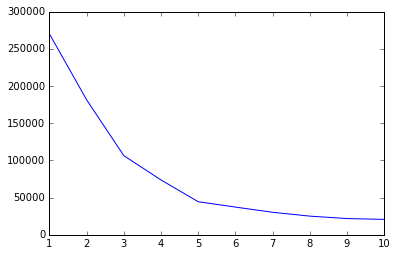

In [12]:
plt.plot(range(1, 11), wcss)

In [18]:
# Choose k = 5
kmeans_classifier = KMeans(n_clusters=5, init="k-means++",
                         n_init=10, random_state=0)
y_kmeans = kmeans_classifier.fit_predict(X)

In [19]:
# Visualization
from matplotlib.colors import ListedColormap
X_set, y_set = X, y_kmeans
X1 = X_set[:, 0]
X2 = X_set[:, 1]

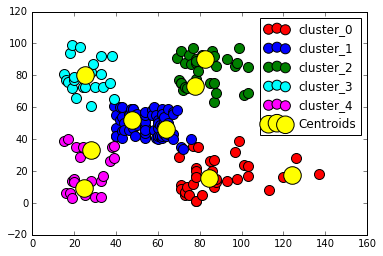

In [31]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(0, 5):
    plt.scatter(X[y_kmeans==i, 0], X[y_kmeans==i, 1], s=100, c=colors[i],
                label="cluster_" + str(i))
plt.scatter(kmeans.cluster_centers_[:, 0], 
           kmeans.cluster_centers_[:, 1],
           s = 308, c='yellow', label='Centroids')
plt.legend()